# Descriptive Statistics
<hr style="border:2px solid black">

<img src='descriptive_stats.png' width=600>

## 1. Overview

### Population

- the whole group of people, items, or element of interest
- usually too large and expensive to study in their entirety
- `parameter`: characteric value of a population

### Sample

- a subset of the population one selects for a study
- studying sample data can be more efficient and cost-effective
- `statistic`: characteric value of a sample

### Random Variable

> (eg. coin toss / dice roll etc.)

- a variable that takes values randomly from a given list or range
- may represent the input or output data of a statistical model
- can be described by a probability distribution function that assigns a probability to each possible outcome

### Categorical Variable

- values or labels that do not follow a natural ordering - no value attached to a list
- example: 
    + gender
    + season of the year

### Ordinal Variable

- have values that follow a natural order, but the difference between two values is not measurable (often opinion / experience)
- example: 
    + movie ratings (5 stars, …, 1 star)
    + evaluation (‘very good’, ‘good’, …, ‘awful’)

### Metric Variable

- values have natural ordering and the distance between two values is interpretable
- example: 
    + height in cm
    + price in $

### Discrete Variable

- have a finite number of possible values
- ordinal and categorical variables are always discrete
- metric variables can often be discrete
- example:
    + number of books delivered by Amazon each day
    + movie ratings (5 stars, …, 1 star)

### Continuous Variable

- metric variables having no minimum distance between values
examples:
    + Unix Time (measured in number of seconds since 1970)
    + height (in cm)

### Descriptive Statistics

- aims to describe a given dataset visually and through metrics 
- crucial step in exploratory analysis that gives better feeling for the data and its characteristics

|type| what it is|
|:--:|:--:|
|Frequency Distribution|shows the count, percent, or frequency of different outcomes occurring in dataset|
|Central Tendency|single-value summary of a dataset using that reflects the center of its distribution|
|Dispersion| a measure of variability, like the range, variance, or standard deviation of dataset|

### Inferential Statistics

- aims to draw conclusions / make generalizations about a population by examining random samples
- accuracy depends largely on how well sample data represents the population

|type|what it is|
|:--:|:--:|
|Regression Analysis|show the relationship between a set of independent variables and a dependent variable|
|Hypothesis Testing|access whether relationships observed in sample data actually exist in the population|
|Confidence Intervals|takes sampling error into account to suggest a range of values for an actual population parameter|

### Measures of Central Tendency

- `mean`: for metric variables
- `median` and `quantiles`: for ordinal or metric variables
- `mode`: for ordinal or categorical variables

### Measures of Dispersion

- `variance`: for metric variables
- `standard deviation`: for metric variables
- `frequency table`: for categorical or ordinal variables

### Descriptive statistics for two variables

- `Pearson correlation`: for metric variables
- `contingency table` and `Cramer correlation`: for ordinal or categorical variables

<hr style="border:2px solid black">

## 2. Example: Penguin Dataset 

**load packages**

In [1]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# %matplotlib inline ... Used for spacing

**load data**

In [2]:
df = sns.load_dataset("penguins")

**show data head**

In [3]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**check dataframe shape**

In [11]:
df.shape

(344, 7)

In [10]:
type(df.shape)

tuple

**dataframe columns**

In [20]:
df.columns
#df.columns[0:4]

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

### Variable types

Categorical Variables: 'species',  'sex', 'island'

Metric Variables: 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'



**dataframe summary**

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [23]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

**Q: What are the variable types?**

In [24]:
numerical_variables = [
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g'
]

categorical_variables = [
    'species',
    'island',
    'sex'
]

**drop missing values**

In [26]:
df.dropna(inplace=True)
df.shape

(333, 7)

**create numerical and categorical subframes**

In [94]:
df_num = df[numerical_variables]
df_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0
...,...,...,...,...
338,47.2,13.7,214.0,4925.0
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [ ]:
df_cat = df[categorical_variables]

In [28]:
## arithmetic mean
mean = df_num.mean()
mean

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64

In [29]:
## median
median = df_num.median()
median

bill_length_mm         44.5
bill_depth_mm          17.3
flipper_length_mm     197.0
body_mass_g          4050.0
dtype: float64

In [ ]:
# while mean & median are close, recognise there unlikely to be large outliers

In [30]:
df_num.max()

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64

In [32]:
## mode
df.mode(numeric_only=False)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,Male


In [33]:
## Variance
df['bill_depth_mm'].var()

3.8778883099967416

In [34]:
## Standard Deviation
df['bill_depth_mm'].std()

1.9692354633199

In [35]:
np.sqrt(df['bill_depth_mm'].var())

1.9692354633199

In [36]:
## Range
df['bill_depth_mm'].max() - df['bill_depth_mm'].min()

8.4

In [37]:
# descriptive statistics for numerical features
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [38]:
## IQR
df['bill_depth_mm'].quantile(0.75) - df['bill_depth_mm'].quantile(0.25)

3.0999999999999996

In [39]:
# use scipy to perform the same function for interquartile range

from scipy import stats
stats.iqr(df['bill_depth_mm'])

3.0999999999999996

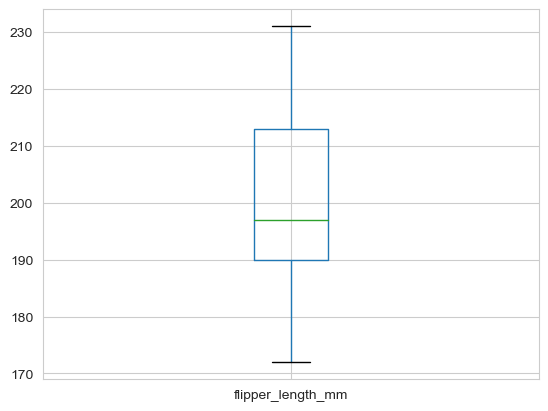

In [44]:
## Boxplot
df.boxplot('flipper_length_mm');

### Distributions 

#### Univariate distributions

Frequency table: `.value_counts()`

Histogram: `.hist()`


#### Multivariate distributions

Categorical and Ordinal Variables: `crosstab()`

Metric Variables: `corr()`

In [45]:
df.sex.value_counts()

Male      168
Female    165
Name: sex, dtype: int64

In [46]:
df.sex.value_counts(normalize=True)

# this outputs the proportion, as a share of 1

Male      0.504505
Female    0.495495
Name: sex, dtype: float64

#### Look at histograms

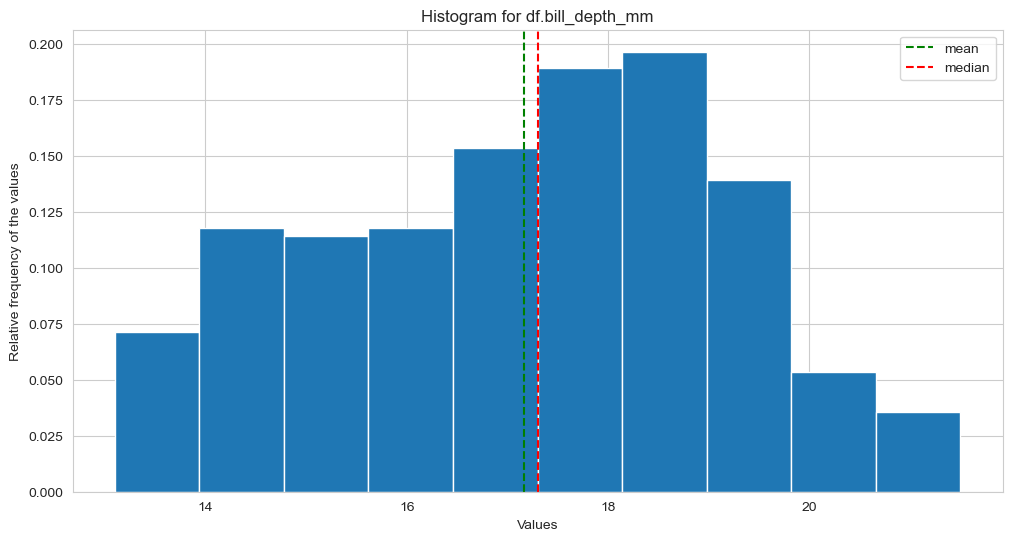

In [47]:
df.bill_depth_mm.hist(figsize=(12,6), density=True, bins=10)
plt.title('Histogram for df.bill_depth_mm')
plt.xlabel('Values')
plt.ylabel('Relative frequency of the values')
plt.axvline(df.bill_depth_mm.mean(), c='g', linestyle='--', label='mean')
plt.axvline(df.bill_depth_mm.median(), c='r', linestyle='--', label='median')
plt.legend()
plt.show()

### Contingency Table

In [105]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [106]:
df[df['species']=='Adelie']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [49]:
# crosstab works in a  similar way to pivot tables in excel

pd.crosstab(
    df['species'],
    df['sex'],
    margins=True
)

sex,Female,Male,All
species,,,
Adelie,73,73,146
Chinstrap,34,34,68
Gentoo,58,61,119
All,165,168,333


In [50]:
crosstab_data = pd.crosstab(
    df['species'],
    df['sex'],
    margins=True
)

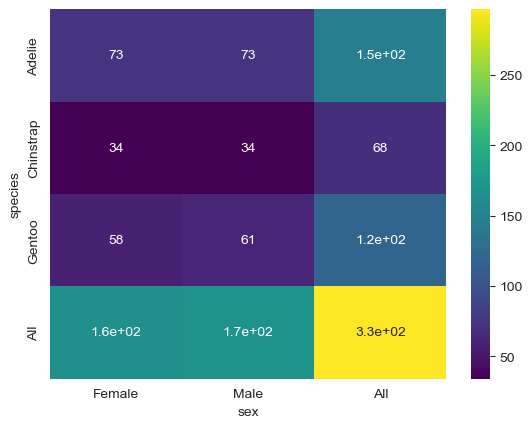

In [53]:
sns.heatmap(
    crosstab_data,
    cmap='viridis',
    robust=True,
    annot=True
);

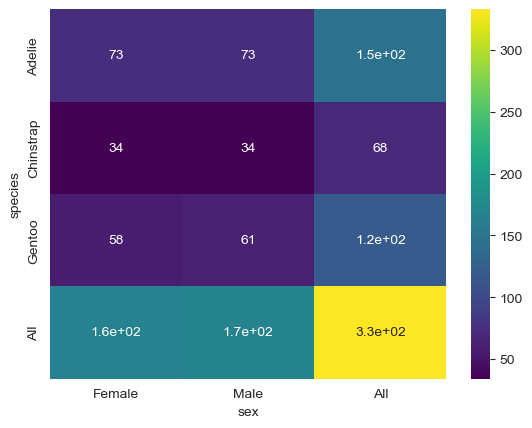

In [54]:
sns.heatmap(
    crosstab_data,
    cmap='viridis',
    robust=False,
    annot=True
);

### Correlations

**Pearson Correlation**

In [55]:
correlations = df_num.corr()
correlations

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [ ]:
# this shows that flipper & bill length are positively correlated
# but bill depth & flipper length are negatively correlated
# closer to 1 = stronger correlation

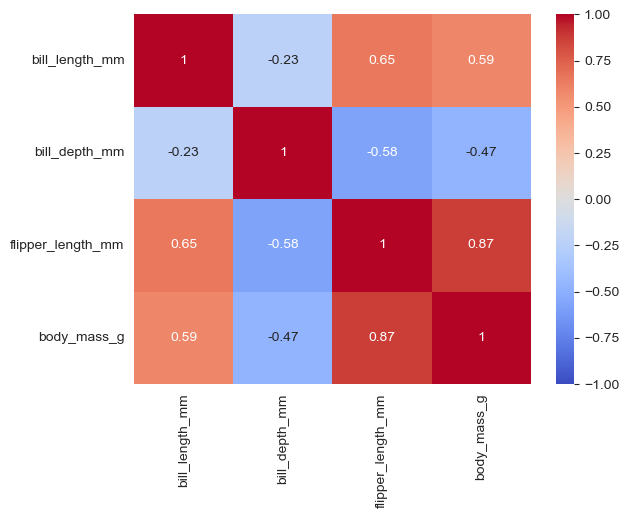

In [56]:
# we can visualise this through a heatmap

sns.heatmap(correlations,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=+1
           );

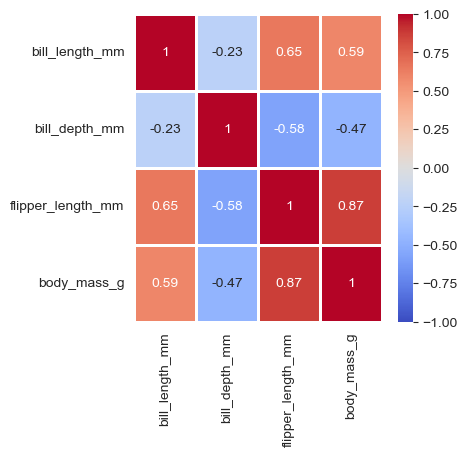

In [57]:
# adda a line between squares through : linewidth=1
# check what is possible for a method's arguement with shift+tab

plt.figure(figsize=(4,4),dpi=100)
sns.heatmap(
    data=correlations,
    cmap='coolwarm',
    linecolor='white',
    linewidth=1,
    annot=True,
    vmin=-1,
    vmax=1
);

**Corrected Cramer's Correlation**

In [58]:
def cramers_corrected_stat(df,cat_col1,cat_col2):
    """
    This function spits out corrected Cramer's correlation statistic
    between two categorical columns of a dataframe 
    """
    crosstab = pd.crosstab(df[cat_col1],df[cat_col2])
    chi_sqr = stats.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    r,k = crosstab.shape
    phi_sqr_corr = max(0, chi_sqr/n - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    result = np.sqrt(phi_sqr_corr / min( (k_corr-1), (r_corr-1)))
    return round(result,3)

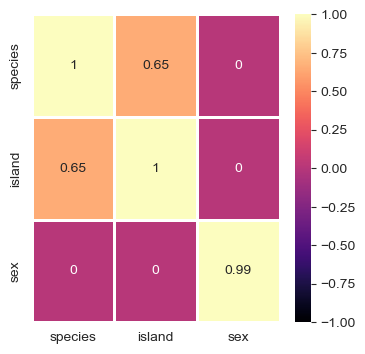

In [59]:
cramer_v_corr = dict(
    zip(
        categorical_variables,
        [[cramers_corrected_stat(df,f1,f2) for f2 in categorical_variables] for f1 in categorical_variables]
    )
)

plt.figure(figsize=(4,4),dpi=100)
sns.heatmap(data=pd.DataFrame(data=cramer_v_corr,index=categorical_variables),
            cmap='magma',
            linecolor='white',
            linewidth=1,
            annot=True,
            vmin=-1,
            vmax=1
           );

<hr style="border:2px solid black">

## References

- [Population vs Sample: Uses and Examples](https://statisticsbyjim.com/basics/population-vs-sample/)
- [Descriptive vs. Inferential Statistics: Key Differences and Measurement Techniques](https://www.simplilearn.com/difference-between-descriptive-inferential-statistics-article)
- [YouTube video series on Descriptive Statistics](https://www.youtube.com/playlist?list=PLTNMv857s9WVStKLco6ZBOsfSGXzJ1L0f)
- [Introduction to Statistics: An Intuitive Guide for Analyzing Data and Unlocking Discoveries](https://www.amazon.de/-/en/Jim-Frost/dp/1735431109)

# CHALLENGES

## Exercise: Penguins Data


#### Task 1
Read in the Penguins Dataset with pandas.

> Related files
>+ penguins_simple.csv (12 KB)

#### Task 2
Go through each column and determine its level of measurement and dtype

#### Task 3
Find out how to calculate some of the above statistics in pandas

#### Task 4
Post one statistical observation about the penguins to the slack channel.

In [61]:
# 1. Read in the Penguins Dataset with pandas:

df_penguins = pd.read_csv('../data/penguins_simple.csv', sep=';')
df_penguins

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


In [78]:
# 2. Go through each column and determine its level of measurement and dtype

df_penguins.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [88]:
# 3. Find out how to calculate some of the above statistics in pandas

print('Flipper Length Mean:',df_penguins['Flipper Length (mm)'].mean(),'mm')
print('Culmen Depth Standard Dev.:',df_penguins['Culmen Depth (mm)'].std(),'mm')
print('Culmen Length (mm) min.:',df_penguins['Culmen Length (mm)'].min(),'mm')
print('Culmen Length (mm) Q25%:',df_penguins['Culmen Length (mm)'].quantile(0.25),'mm')
print('Flipper Length Max.:',df_penguins['Flipper Length (mm)'].max(),'mm')

Flipper Length Mean: 200.96696696696696 mm
Culmen Depth Standard Dev.: 1.9692354633199 mm
Culmen Length (mm) min.: 32.1 mm
Culmen Length (mm) Q25%: 39.5 mm
Flipper Length Max.: 231.0 mm


In [91]:
crosstab_peng = pd.crosstab(df_penguins['Species'],df_penguins['Sex'],margins=True)

crosstab_peng

Sex,FEMALE,MALE,All
Species,,,
Adelie,73,73,146
Chinstrap,34,34,68
Gentoo,58,61,119
All,165,168,333


In [96]:
numerical_variables = [
    'Culmen Length (mm)',
    'Culmen Depth (mm)',
    'Flipper Length (mm)',
    'Body Mass (g)'
]

peng_num = df_penguins[numerical_variables]

peng_num

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
328,47.2,13.7,214.0,4925.0
329,46.8,14.3,215.0,4850.0
330,50.4,15.7,222.0,5750.0
331,45.2,14.8,212.0,5200.0


In [101]:
peng_corr = peng_num.corr()
peng_corr

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Culmen Length (mm),1.000000,-0.228626,0.653096,0.589451
Culmen Depth (mm),-0.228626,1.000000,-0.577792,-0.472016
Flipper Length (mm),0.653096,-0.577792,1.000000,0.872979
Body Mass (g),0.589451,-0.472016,0.872979,1.000000


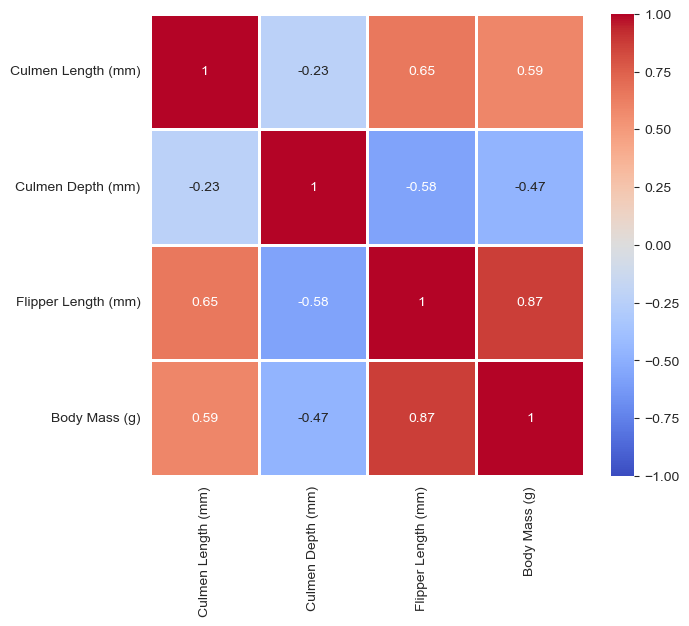

In [104]:
plt.figure(figsize=(7,6),dpi=100)
sns.heatmap(
    data=peng_corr,
    cmap='coolwarm',
    linecolor='white',
    linewidth=1,
    annot=True,
    vmin=-1,
    vmax=1
);

Body Mass and Flipper Length are strongly positively correlated
Culmen Depth is negatively correlated against all other variables, particularly Flipper Length and Body Mass.